In [1]:
import os
import sys
import math
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Checkout\\Downloads'

In [2]:
df = pd.read_csv ('data_1.csv',encoding='utf-8-sig')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('CA', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('median_dom', axis=1, inplace=True)

In [3]:
# for column in df.columns:
#     print(column)
df.head()

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
0,1124,0.087655,0.066924,0.085906,0.083630,0.260870,0.102273,0.046296,0.075377,0.079208,...,0,0,0,0,0,0,0,0,0,0
1,426,0.232529,0.321624,0.442430,0.486742,0.014493,0.000000,0.000000,0.000000,0.049505,...,0,0,0,0,0,0,0,0,0,0
2,360,0.219138,0.372544,0.251275,0.387327,0.000000,0.267113,0.271218,0.269650,0.293644,...,0,0,0,0,0,0,0,0,0,0
3,1306,0.143657,0.133634,0.155704,0.162495,0.028986,0.267113,0.000000,0.010050,0.099010,...,0,0,0,0,0,0,0,0,0,0
4,241,0.116873,0.122886,0.160935,0.162173,0.521739,0.363636,0.240741,0.321608,0.178218,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Apply L2 Norm...
col=['median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'months_of_supply', 'avg_sale_to_list',
       'sold_above_list', 'price_drops', 'off_market_in_two_weeks']
#df[col] = preprocessing.normalize(df[col], norm='l2')

In [5]:
df.head()

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
0,1124,0.087655,0.066924,0.085906,0.083630,0.260870,0.102273,0.046296,0.075377,0.079208,...,0,0,0,0,0,0,0,0,0,0
1,426,0.232529,0.321624,0.442430,0.486742,0.014493,0.000000,0.000000,0.000000,0.049505,...,0,0,0,0,0,0,0,0,0,0
2,360,0.219138,0.372544,0.251275,0.387327,0.000000,0.267113,0.271218,0.269650,0.293644,...,0,0,0,0,0,0,0,0,0,0
3,1306,0.143657,0.133634,0.155704,0.162495,0.028986,0.267113,0.000000,0.010050,0.099010,...,0,0,0,0,0,0,0,0,0,0
4,241,0.116873,0.122886,0.160935,0.162173,0.521739,0.363636,0.240741,0.321608,0.178218,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df['quality']
X = df.drop('quality',axis=1)
#, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

In [7]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [8]:
print("X_train: "+str(len(X_train)))
print("X_test: "+str(len(X_test)))
print("X_val: "+str(len(X_val)))
print("\n")
print("y_train: "+str(len(y_train)))
print("y_test: "+str(len(y_test)))
print("y_val: "+str(len(y_val)))


X_train: 191003
X_test: 53057
X_val: 21223


y_train: 191003
y_test: 53057
y_val: 21223


In [9]:
randomForestClf = RandomForestClassifier(n_estimators=100)

randomForestClf.fit(X_train,y_train)

# Test Set
y_pred = randomForestClf.predict(X_test)
print(classification_report(y_test, y_pred))


# Validation Set
y_val_pred = randomForestClf.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     15634
           1       0.68      0.59      0.63     16914
           2       0.70      0.81      0.75     20509

    accuracy                           0.71     53057
   macro avg       0.71      0.70      0.70     53057
weighted avg       0.71      0.71      0.71     53057

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6265
           1       0.68      0.59      0.63      6610
           2       0.71      0.80      0.75      8348

    accuracy                           0.71     21223
   macro avg       0.71      0.70      0.70     21223
weighted avg       0.71      0.71      0.71     21223



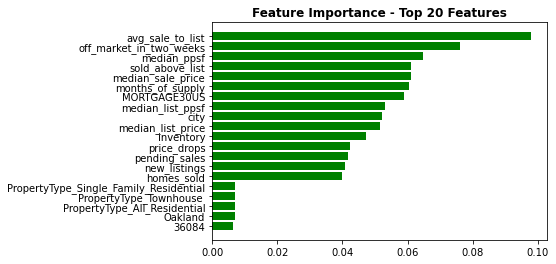

In [10]:
feat_imp_sort = rf.feature_importances_.argsort()

X_axis = X_train.columns[feat_imp_sort]
Y_axis = rf.feature_importances_[feat_imp_sort]
X_axis = X_axis[-20:]
Y_axis = Y_axis[-20:]
plt.barh(X_axis, Y_axis, color='green')
plt.title("Feature Importance - Top 20 Features", fontweight='bold')
plt.grid(False)
plt.show()

In [11]:
#Apply L2 Norm
col=['quality','city','off_market_in_two_weeks','months_of_supply','avg_sale_to_list','sold_above_list','inventory','median_ppsf','median_list_ppsf','price_drops','median_sale_price','median_list_price','new_listings','MORTGAGE30US','pending_sales','homes_sold','city','PropertyType_Single_Family_Residential','PropertyType_All_Residential','Oakland','36084']


In [12]:
df[col]

,quality,city,off_market_in_two_weeks,months_of_supply,avg_sale_to_list,sold_above_list,inventory,median_ppsf,median_list_ppsf,price_drops,...,median_list_price,new_listings,MORTGAGE30US,pending_sales,homes_sold,city,PropertyType_Single_Family_Residential,PropertyType_All_Residential,Oakland,36084
0,1,1124,0.300000,0.079208,0.536987,0.368421,0.075377,0.085906,0.083630,0.448047,...,0.066924,0.046296,3.3450,0.102273,0.260870,1124,0,1,0,0
1,0,426,0.500000,0.049505,0.574807,0.500000,0.000000,0.442430,0.486742,0.460740,...,0.321624,0.000000,3.4650,0.000000,0.014493,426,1,0,0,0
2,0,360,0.190401,0.293644,0.569079,1.000000,0.269650,0.251275,0.387327,0.460740,...,0.372544,0.271218,2.9750,0.267113,0.000000,360,0,0,0,0
3,2,1306,0.190401,0.099010,0.564207,0.666667,0.010050,0.155704,0.162495,0.600491,...,0.133634,0.000000,4.3700,0.267113,0.028986,1306,0,0,0,0
4,1,241,0.166667,0.178218,0.475787,0.351351,0.321608,0.160935,0.162173,0.412867,...,0.122886,0.240741,3.9640,0.363636,0.521739,241,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265278,0,279,0.000000,0.128713,0.681215,0.750000,0.020101,0.495845,0.509546,0.356580,...,0.524385,0.027778,5.2300,0.000000,0.043478,279,0,0,0,0
265279,2,1227,0.500000,0.059406,0.498721,0.285714,0.015075,0.128291,0.164257,0.460740,...,0.155065,0.046296,3.5680,0.022727,0.086957,1227,0,0,0,0
265280,1,750,0.136364,0.118812,0.450768,0.230769,0.070352,0.133206,0.172212,0.112669,...,0.159953,0.074074,4.0325,0.113636,0.173913,750,0,0,0,0
265281,2,838,0.190401,0.356436,0.391196,0.000000,0.120603,0.187890,0.209214,0.283407,...,0.144323,0.037037,4.2550,0.267113,0.086957,838,0,1,0,0


In [13]:
# y = df['quality']
# X = df.drop('quality',axis=1)
#, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
# neighbors = np.arange(1, 5)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))
  
# # Loop over K values
# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
      
#     # Compute training and test data accuracy
#     train_accuracy[i] = knn.score(X_train, y_train)
#     test_accuracy[i] = knn.score(X_test, y_test)
  
# # Generate plot
# plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
# plt.legend()
# plt.xlabel('n_neighbors')
# plt.ylabel('Accuracy')
# plt.show()
df['quality']


0         1
1         0
2         0
3         2
4         1
         ..
265278    0
265279    2
265280    1
265281    2
265282    2
Name: quality, Length: 265283, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score
y = df['quality']
X = df.drop('quality',axis=1)
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knn5 = KNeighborsClassifier(n_neighbors = 10)
#knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(X_train, y_train)
#knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
#y_pred_1 = knn1.predict(X_test)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
#print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 56.220503309660586


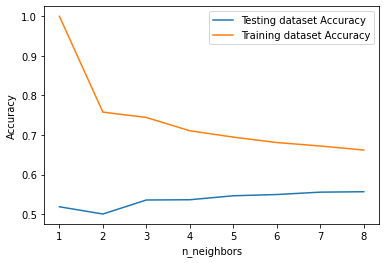

In [20]:
from sklearn.metrics import accuracy_score
y = df['quality']
X = df.drop('quality',axis=1)
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
train_accuracy

array([1.        , 0.75786331, 0.74435822, 0.71077392, 0.69471557,
       0.68101447, 0.67226405, 0.66205104])

In [22]:
test_accuracy

array([0.5186894 , 0.50038449, 0.53580314, 0.5364515 , 0.54650865,
       0.54965999, 0.55561587, 0.5567015 ])

In [15]:
df

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
0,1124,0.087655,0.066924,0.085906,0.083630,0.260870,0.102273,0.046296,0.075377,0.079208,...,0,0,0,0,0,0,0,0,0,0
1,426,0.232529,0.321624,0.442430,0.486742,0.014493,0.000000,0.000000,0.000000,0.049505,...,0,0,0,0,0,0,0,0,0,0
2,360,0.219138,0.372544,0.251275,0.387327,0.000000,0.267113,0.271218,0.269650,0.293644,...,0,0,0,0,0,0,0,0,0,0
3,1306,0.143657,0.133634,0.155704,0.162495,0.028986,0.267113,0.000000,0.010050,0.099010,...,0,0,0,0,0,0,0,0,0,0
4,241,0.116873,0.122886,0.160935,0.162173,0.521739,0.363636,0.240741,0.321608,0.178218,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265278,279,0.301923,0.524385,0.495845,0.509546,0.043478,0.000000,0.027778,0.020101,0.128713,...,0,0,0,0,0,0,0,0,0,0
265279,1227,0.087168,0.155065,0.128291,0.164257,0.086957,0.022727,0.046296,0.015075,0.059406,...,0,0,0,0,0,0,0,0,0,0
265280,750,0.084002,0.159953,0.133206,0.172212,0.173913,0.113636,0.074074,0.070352,0.118812,...,0,0,0,0,0,0,0,0,0,0
265281,838,0.199610,0.144323,0.187890,0.209214,0.086957,0.267113,0.037037,0.120603,0.356436,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_accuracy

NameError: name 'train_accuracy' is not defined

In [ ]:
test_accuracy

In [ ]:
# rf = RandomForestClassifier(n_estimators=150)
# rf.fit(X_train, y_train)

In [ ]:
print("X_train: "+str(len(X_train)))
print("X_test: "+str(len(X_test)))
#print("X_val: "+str(len(X_val)))
print("\n")
print("y_train: "+str(len(y_train)))
print("y_test: "+str(len(y_test)))
#print("y_val: "+str(len(y_val)))

In [ ]:
df.head()

In [9]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}  

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
g_res.best_score_